## Imports


In [1]:
import numpy as np
import pandas as pd
import pickle as pic
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import (
    classification_report, confusion_matrix, ConfusionMatrixDisplay,
    accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
)
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split, GridSearchCV, PredefinedSplit
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
air_data = pd.read_csv("Invistico_Airline.csv")

## Data Cleaning

In [3]:
air_data.head(10)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,...,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,...,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,...,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,...,2,2,2,4,5,3,4,2,30,26.0


In [4]:
air_data.dtypes

satisfaction                          object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
dtype: obj

In [5]:
air_data.shape

(129880, 22)

In [6]:
print(air_data.isna().any(axis=1).sum())

393


In [7]:
# Drop missing values.
air_data_subset = air_data.dropna()

In [8]:
air_data_subset.head(10)

,satisfaction,Customer Type,Age,Type of Travel,Class,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,...,Online support,Ease of Online booking,On-board service,Leg room service,Baggage handling,Checkin service,Cleanliness,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes
0,satisfied,Loyal Customer,65,Personal Travel,Eco,265,0,0,0,2,...,2,3,3,0,3,5,3,2,0,0.0
1,satisfied,Loyal Customer,47,Personal Travel,Business,2464,0,0,0,3,...,2,3,4,4,4,2,3,2,310,305.0
2,satisfied,Loyal Customer,15,Personal Travel,Eco,2138,0,0,0,3,...,2,2,3,3,4,4,4,2,0,0.0
3,satisfied,Loyal Customer,60,Personal Travel,Eco,623,0,0,0,3,...,3,1,1,0,1,4,1,3,0,0.0
4,satisfied,Loyal Customer,70,Personal Travel,Eco,354,0,0,0,3,...,4,2,2,0,2,4,2,5,0,0.0
5,satisfied,Loyal Customer,30,Personal Travel,Eco,1894,0,0,0,3,...,2,2,5,4,5,5,4,2,0,0.0
6,satisfied,Loyal Customer,66,Personal Travel,Eco,227,0,0,0,3,...,5,5,5,0,5,5,5,3,17,15.0
7,satisfied,Loyal Customer,10,Personal Travel,Eco,1812,0,0,0,3,...,2,2,3,3,4,5,4,2,0,0.0
8,satisfied,Loyal Customer,56,Personal Travel,Business,73,0,0,0,3,...,5,4,4,0,1,5,4,4,0,0.0
9,satisfied,Loyal Customer,22,Personal Travel,Eco,1556,0,0,0,3,...,2,2,2,4,5,3,4,2,30,26.0


In [9]:
missing_after_drop = air_data_subset.isna().sum().sum()
print(f"Total missing values after dropping rows: {missing_after_drop}") 

Total missing values after dropping rows: 0


In [10]:
# Convert categorical features to one-hot encoded features.
air_data_subset.dtypes
air_data_subset_dummies = pd.get_dummies(air_data_subset, columns=["Customer Type", "Type of Travel", "Class"])

In [11]:
air_data_subset_dummies.head(10)

,satisfaction,Age,Flight Distance,Seat comfort,Departure/Arrival time convenient,Food and drink,Gate location,Inflight wifi service,Inflight entertainment,Online support,...,Online boarding,Departure Delay in Minutes,Arrival Delay in Minutes,Customer Type_Loyal Customer,Customer Type_disloyal Customer,Type of Travel_Business travel,Type of Travel_Personal Travel,Class_Business,Class_Eco,Class_Eco Plus
0,satisfied,65,265,0,0,0,2,2,4,2,...,2,0,0.0,True,False,False,True,False,True,False
1,satisfied,47,2464,0,0,0,3,0,2,2,...,2,310,305.0,True,False,False,True,True,False,False
2,satisfied,15,2138,0,0,0,3,2,0,2,...,2,0,0.0,True,False,False,True,False,True,False
3,satisfied,60,623,0,0,0,3,3,4,3,...,3,0,0.0,True,False,False,True,False,True,False
4,satisfied,70,354,0,0,0,3,4,3,4,...,5,0,0.0,True,False,False,True,False,True,False
5,satisfied,30,1894,0,0,0,3,2,0,2,...,2,0,0.0,True,False,False,True,False,True,False
6,satisfied,66,227,0,0,0,3,2,5,5,...,3,17,15.0,True,False,False,True,False,True,False
7,satisfied,10,1812,0,0,0,3,2,0,2,...,2,0,0.0,True,False,False,True,False,True,False
8,satisfied,56,73,0,0,0,3,5,3,5,...,4,0,0.0,True,False,False,True,True,False,False
9,satisfied,22,1556,0,0,0,3,2,0,2,...,2,30,26.0,True,False,False,True,False,True,False


In [12]:
# Display variables.
air_data_subset_dummies.dtypes

satisfaction                          object
Age                                    int64
Flight Distance                        int64
Seat comfort                           int64
Departure/Arrival time convenient      int64
Food and drink                         int64
Gate location                          int64
Inflight wifi service                  int64
Inflight entertainment                 int64
Online support                         int64
Ease of Online booking                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Cleanliness                            int64
Online boarding                        int64
Departure Delay in Minutes             int64
Arrival Delay in Minutes             float64
Customer Type_Loyal Customer            bool
Customer Type_disloyal Customer         bool
Type of Travel_Business travel          bool
Type of Tr

## **Model Building**

In [13]:
# Separate the dataset into labels (y) and features (X).
X = air_data_subset_dummies.drop(columns=["satisfaction"])
y = air_data_subset_dummies["satisfaction"]

In [14]:
# Separate into train, validate, test sets.
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
X_tr, X_val, y_tr, y_val = train_test_split(X_train, y_train, test_size=0.20, random_state=42)

### Tune the Model

In [15]:
# Determine set of hyperparameters.
cv_params = {
    "n_estimators": [100, 200, 400],
    "max_depth": [10, 15, 20, 25],        
    "min_samples_split": [2, 5, 7, 9],         
    "min_samples_leaf": [1, 3, 5, 7],          
    "max_features": ["sqrt", "log2"], 
}

In [16]:
# Create list of split indices.
n_val = len(X_val)
split_index = []
for i in range(len(X_tr)):
    if i in range(len(X_tr) - n_val, len(X_tr)):
        split_index.append(0)    # validation
    else:
        split_index.append(-1)

custom_split = PredefinedSplit(test_fold=split_index)

Now, instantiate your model.

In [17]:
# Instantiate model.
rf = RandomForestClassifier(random_state=42)
rf.fit(X_train, y_train)

,n_estimators,100
,criterion,'gini'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


Use GridSearchCV to search over the specified parameters.

In [18]:
# Search over specified parameters.
grid_search_model = GridSearchCV(
    estimator=rf,
    param_grid=cv_params,
    scoring='accuracy',
    cv=custom_split,
    refit='f1',
    n_jobs=-1,
    verbose=1
)

In [20]:
%%time 
# Fit the model.
grid_search_model.fit(X_train, y_train)

Fitting 1 folds for each of 384 candidates, totalling 384 fits
CPU times: user 28.8 s, sys: 2.3 s, total: 31.1 s
Wall time: 38min 29s


,estimator,RandomForestC...ndom_state=42)
,param_grid,"{'max_depth': [10, 15, ...], 'max_features': ['sqrt', 'log2'], 'min_samples_leaf': [1, 3, ...], 'min_samples_split': [2, 5, ...], ...}"
,scoring,'accuracy'
,n_jobs,-1
,refit,'f1'
,cv,"PredefinedSpl...ape=(77692,)))"
,verbose,1
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,n_estimators,400


In [21]:
# Obtain optimal parameters.
grid_search_model.best_params_

{'max_depth': 25,
 'max_features': 'sqrt',
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 400}

## **Results and Evaluation** 

In [22]:
# Use optimal parameters on GridSearchCV.
rf_opt = RandomForestClassifier(random_state=42, max_depth=25, max_features="sqrt", min_samples_leaf=1, min_samples_split=5, n_estimators=400)

In [23]:
# Fit the optimal model.
rf_opt.fit(X_train, y_train)

,n_estimators,400
,criterion,'gini'
,max_depth,25
,min_samples_split,5
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,'sqrt'
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [24]:
# Predict on test set.
y_pred = rf_opt.predict(X_test)

### Obtain Performance Scores

In [25]:
# Get precision score.
prec_score = precision_score(y_test, y_pred, pos_label="satisfied")

In [26]:
# Get recall score.
rec_score = recall_score(y_test, y_pred, pos_label="satisfied")

In [27]:
# Get accuracy score.
acc_score = accuracy_score(y_test, y_pred)

In [28]:
# Get F1 score.
f1_score_val = f1_score(y_test, y_pred, pos_label="satisfied")

### Evaluate the Model

In [29]:
# Precision score on test data set.
print(prec_score)

0.969620107223151


In [30]:
# Recall score on test data set.
print(rec_score)

0.9515727540167459


In [31]:
# Accuracy score on test data set.
print(acc_score)

0.9572778944767083


In [32]:
# F1 score on test data set.
print(f1_score_val)

0.9605116637638124


In [33]:
# Create table of results.

# Make base prediction on regular rf model
y_pred_baseline = rf.predict(X_test)

results = []
results.append({
    "Model" : "Base random forest model",
    "accuracy score" : accuracy_score(y_test, y_pred_baseline),
    "precision" : precision_score(y_test, y_pred_baseline, pos_label="satisfied"),
    "recall" : recall_score(y_test, y_pred_baseline, pos_label="satisfied"),
    "f1 score" : f1_score(y_test, y_pred_baseline, pos_label="satisfied")
})

results.append({
    "Model" : "Optimal random forest model",
    "accuracy score" : acc_score,
    "precision" : prec_score,
    "recall" : rec_score,
    "f1 score" : f1_score_val
})

results_df = pd.DataFrame(results)
results_df

,Model,accuracy score,precision,recall,f1 score
0,Base random forest model,0.957093,0.969772,0.951064,0.960327
1,Optimal random forest model,0.957278,0.969620,0.951573,0.960512


## **Improvements**

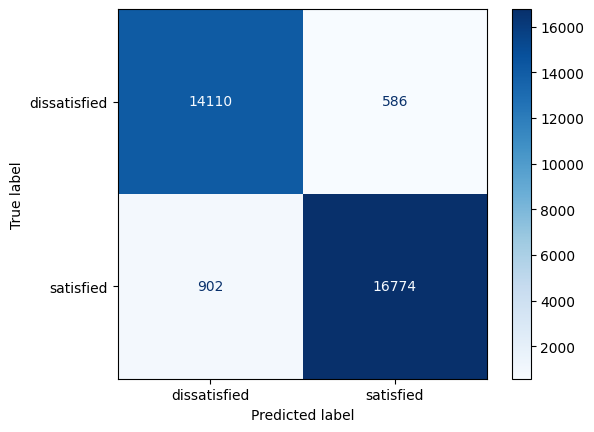

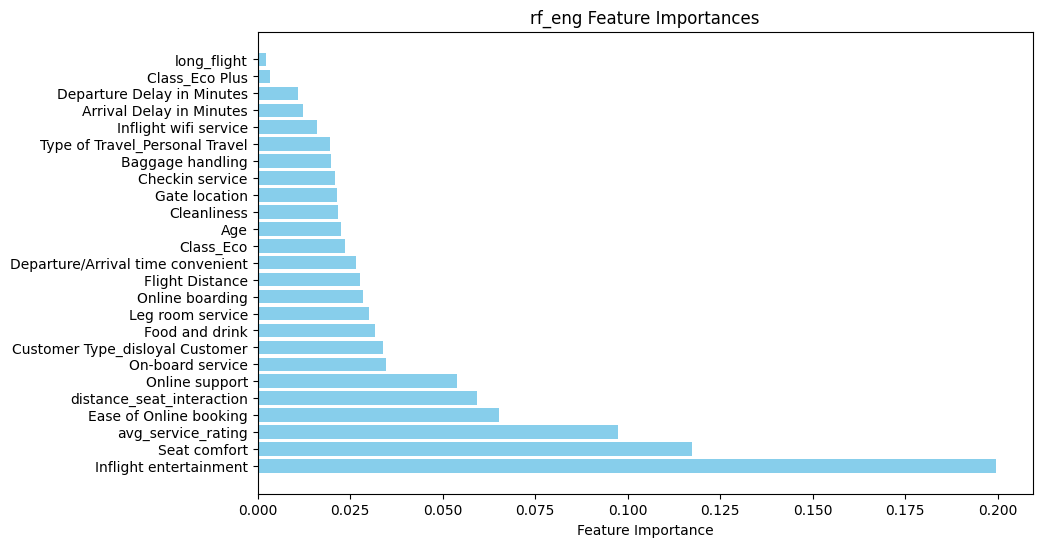

In [34]:
# Feature engineering
df_fe = air_data_subset.copy()
service_ratings = ["Seat comfort", "Baggage handling", "Inflight wifi service", "Inflight entertainment", "Leg room service", "Online boarding"]
df_fe["avg_service_rating"] = df_fe[service_ratings].mean(axis=1)

# Calculate long flights
df_fe["long_flight"] = df_fe["Flight Distance"] > 2250

# Capture the effect seat comfort and flight distance have on satisfaction
df_fe["distance_seat_interaction"] = df_fe["Flight Distance"] * df_fe["Seat comfort"]

# Encode
categorical_cols = ["Customer Type", "Type of Travel", "Class"]
df_fe = pd.get_dummies(df_fe, columns=categorical_cols, drop_first=True)

# Train test
X_fe = df_fe.drop('satisfaction', axis=1)
y_fe = df_fe['satisfaction']

X_train_fe, X_test_fe, y_train_fe, y_test_fe = train_test_split(X_fe, y_fe, test_size=0.25, random_state=42)

rf_fe = RandomForestClassifier(n_estimators=200, max_depth=20, random_state=42, n_jobs=-1)
rf_fe.fit(X_train_fe, y_train_fe)

y_pred_fe = rf_fe.predict(X_test_fe)

# Show results
cm = confusion_matrix(y_test_fe, y_pred_fe, labels=["dissatisfied", "satisfied"])
disp = ConfusionMatrixDisplay(confusion_matrix=cm,
                              display_labels=["dissatisfied", "satisfied"])
disp.plot(cmap=plt.cm.Blues)
plt.show()

# Feature importance 
feat_imp = pd.DataFrame({
    "Feature": X_fe.columns,
    "Importance": rf_fe.feature_importances_
}).sort_values(by="Importance", ascending=False)

plt.figure(figsize=(10, 6))
plt.barh(feat_imp["Feature"], feat_imp["Importance"], color="skyblue")
plt.xlabel("Feature Importance")
plt.title("rf_eng Feature Importances")
plt.show()